In [13]:
import pandas as pd
path = '/Users/youngki/study/DeepLearning/3.9.18/data/house-prices-advanced-regression-techniques'
train_path = path + '/train.csv'
test_path = path + '/test.csv'
test_targe_path  = path + '/sample_submission.csv'

df = pd.read_csv(train_path, na_values='NA          ')
df.columns = df.columns.str.strip()
df2 = pd.read_csv(test_path,na_values='NA          ')
df2.columns = df2.columns.str.strip()
df2 = df2.drop(labels='Id',axis = 1)
df3 = pd.read_csv(test_targe_path,na_values='NA          ')
df3.columns = df3.columns.str.strip()
df3 = df3.drop(labels='Id',axis = 1)

df2 = pd.concat([df2,df3], axis= 1)
df2.columns = df2.columns.str.strip()
columns = ['OverallQual', 'OverallCond', 'GrLivArea', 'CentralAir', "TotalBsmtSF", 'SalePrice']
df = pd.concat([df, df2], axis = 0)
df = df.drop(labels='Id',axis = 1)

df = df[columns]
df['TotalBsmtSF'] = df['TotalBsmtSF'].astype('float32')
df = df.dropna(axis=0)
df['CentralAir'] = df['CentralAir'].map({'N' : 0, 'Y':1})

/Users/youngki/.pyenv/versions/3.9.18/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6831: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/youngki/.pyenv/versions/3.9.18/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6832: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

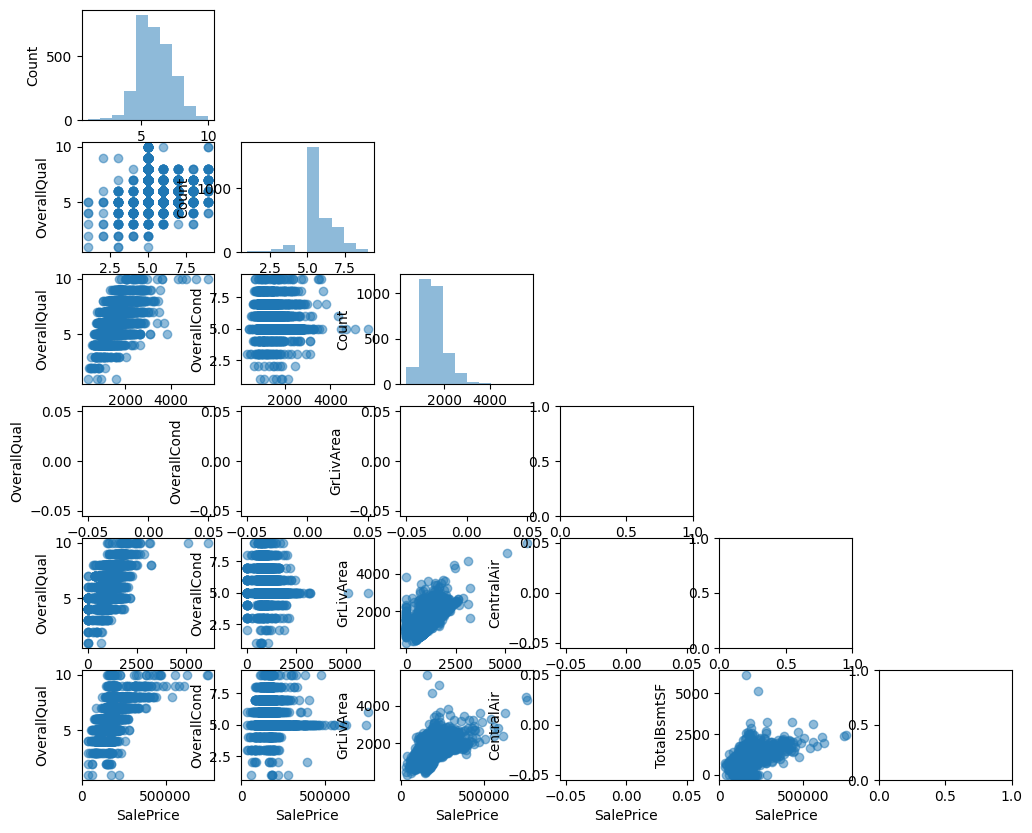

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values , figsize = (12,10),                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
                  names = df.columns, alpha= 0.5)
plt.tight_layout()
plt.show()

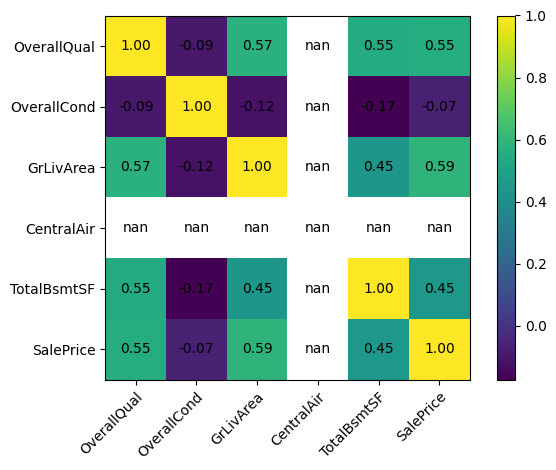

In [15]:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)
hm = heatmap(cm,row_names = df.columns, column_names = df.columns)
plt.tight_layout()
plt.show()
